## Import Library

In [605]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Upload File

In [606]:
# files.upload()

## Read Data

In [607]:
df_train = pd.read_csv('./coba.csv')

In [608]:
df_train.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [609]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [610]:
df_train.dropna(inplace=True)

## Splitting Data

In [611]:
X = df_train['X']
y = df_train['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalization

In [612]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()

## Variables

In [613]:
intercept = 0
slope = 1
learning_rate = 0.001

## Try Plotting the Data

In [614]:
y_pred = intercept + slope * X_train.flatten()

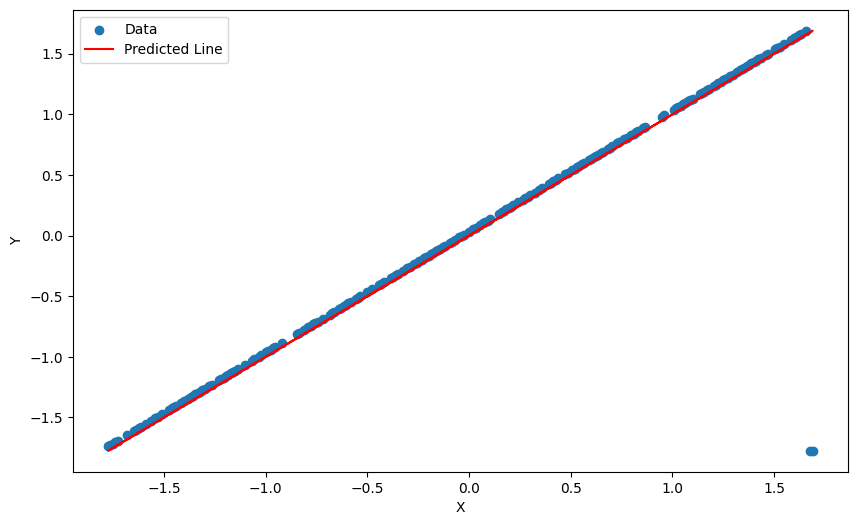

In [615]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Data')
plt.plot(X_train, y_pred, label='Predicted Line', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Loss Function

In [616]:
def SSR(y_true: np.ndarray, y_pred: np.ndarray):
  residual = y_true - y_pred
  return np.sum(residual**2)

In [617]:
SSR(y_train, y_pred)

np.float64(24.128556509412128)

## Gradient Descent

In [618]:
def SSR_derivative(respect_to: str, y_true: list[float], X: list[int], intercept: float, slope: float):
  # f = (y_true - y_predicted) ** 2
  # f = (y_true - (intercept + slope * x)) ** 2
  # f' intercept = 2 * (y_true - (intercept + slope * x)) * -1
  # f' slope = 2 * (y_true - (intercept + slope * x)) * -x

  if respect_to == 'intercept':
    total = 0
    for i in range(len(y_true)):
      total += -2 * (y_true[i] - (intercept + slope * X[i]))
    return total
  elif respect_to == 'slope':
    total = 0
    for i in range(len(y_true)):
      total += -2 * X[i] * (y_true[i] - (intercept + slope * X[i]))
    return total
  else:
    return None

In [619]:
def gradient_descent(y_true: np.ndarray, X: np.ndarray, intercept: float, slope: float, learning_rate: float = 0.1, n: int = 100):
  # new X = old X - learning_rate * derivative_loss_func(respect_to=X)

  for _ in range(n):
    # print(f'Intercept-{i}: {intercept}')
    intercept = intercept - learning_rate * SSR_derivative('intercept', y_true, X, intercept, slope)
    slope = slope - learning_rate * SSR_derivative('slope', y_true, X, intercept, slope)

    if np.isnan(intercept) or np.isnan(slope):
      print('Encounter invalid values')
      return

  print(f'Intercept now: {intercept}')
  print(f'Slope now: {slope}')
  return intercept, slope

In [620]:
intercept, slope = gradient_descent(np.array(y_train), np.array(X_train), intercept, slope, learning_rate, n=50)

Intercept now: [-1.13242749e-17]
Slope now: [0.94255106]


## Try the new intercept and slope

In [621]:
y_pred = intercept + slope * X_train.flatten()

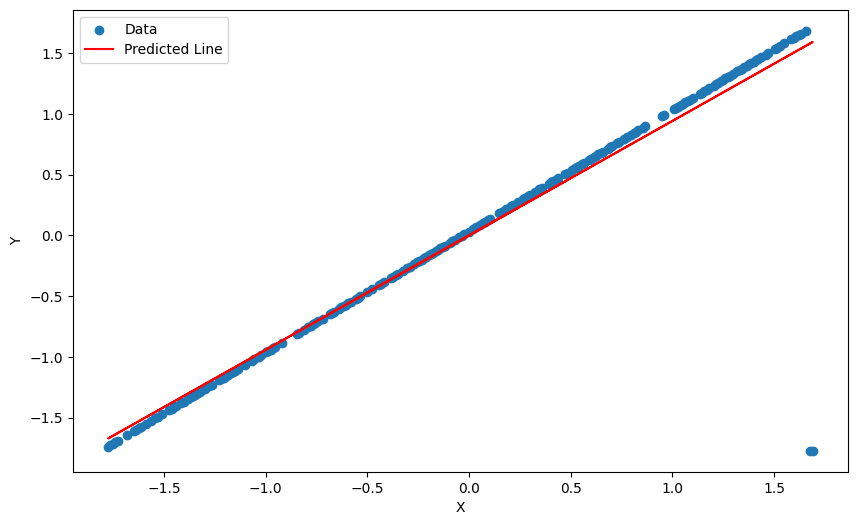

In [622]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Data')
plt.plot(X_train, y_pred, label='Predicted Line', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [623]:
SSR(y_train, y_pred)

np.float64(23.43547646271225)

## Test the models

In [624]:
X_test = X_scaler.transform(np.array(X_test).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1)).flatten()

In [625]:
y_test_predict = intercept + slope * X_test.flatten()

In [626]:
SSR(y_test, y_test_predict)

np.float64(0.3409342776203292)

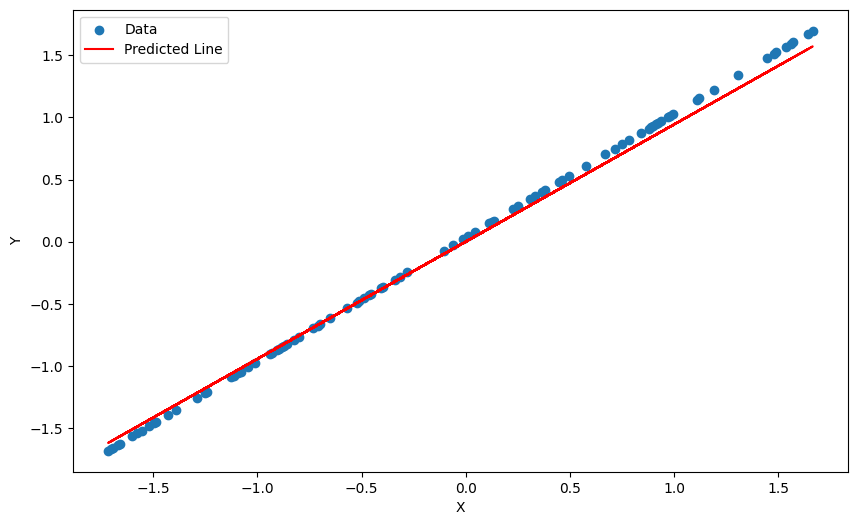

In [627]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Data')
plt.plot(X_test, y_test_predict, label='Predicted Line', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()